## Climate Policies Under Wealth Inequality
This notebook is meant to reproduce the results shown in the paper "Climate policies under wealth inequality", linked here: https://www.pnas.org/doi/10.1073/pnas.1323479111. 

#### Abstract of the paper:
(verbatim) Taming the planet’s climate requires cooperation. Previous failures to reach consensus in climate summits have been attributed, among other factors, to conflicting policies between rich and poor countries, which disagree on the implementation of mitigation measures. Here we implement wealth inequality in a threshold public goods dilemma of cooperation in which players also face the risk of potential future losses. We consider a population exhibiting an asymmetric distribution of rich and poor players that reflects the present-day status of nations and study the behavioral interplay between rich and poor in time, regarding their willingness to cooperate. Individuals are also allowed to exhibit a variable degree of homophily, which acts to limit those that constitute one’s sphere of influence. Under the premises of our model, and in the absence of homophily, comparison between scenarios with wealth inequality and without wealth inequality shows that the former leads to more global cooperation than the latter. Furthermore, we find that the rich generally contribute more than the poor and will often compensate for the lower contribution of the latter. Contributions from the poor, which are crucial to overcome the climate change dilemma, are shown to be very sensitive to homophily, which, if prevalent, can lead to a collapse of their overall contribution. In such cases, however, we also find that obstinate cooperative behavior by a few poor may largely compensate for homophilic behavior.

To achieve the results of the paper, we have created a Public Goods Game (PGG) to model the climate policies game.

In [1]:
#!pip install egttools numpy matplotlib > /dev/null 2>&1

In [2]:
import numpy as np
from typing import Union, List
import matplotlib.pyplot as plt

from egttools.games import AbstractNPlayerGame
#from egttools.analytical import PairwiseComparison
from egttools.numerical import PairwiseComparisonNumerical
from egttools import sample_simplex, calculate_nb_states
from egttools.utils import calculate_stationary_distribution

In [3]:
from ClimateChangeThresholdPGG import ClimateChangeThresholdPGG

In [4]:
group_size = 6
population_size = 200
b_R = 2.5
b_P = 0.625
c = 0.1
r = 0.5
h = 0.1
M = 3
beta = 1

In [35]:
# class ClimateChangeThresholdPGG(AbstractNPlayerGame):
#     def __init__(self,
#                  group_size: int,  # N - Number of individuals that be sampled to play
#                  population_size_Z: int,  # Total population - Will be divided 80-20% (Poor-Rich)
#                  b_R: float,  # Endowment of the rich
#                  b_P: float,  # Endowment of the poor
#                  c: float,  # Fraction of endowment Cs give
#                  r: float,  # Risk factor [0, 1]
#                  h: float,  # Homophily [0, 1] - "Like imitates like" factor
#                  M: float,  # Factor which will calculate success (M x c x avg(b) should be met)
#                  beta: float  # Intensity of selection for imitating strategies
#                  ):

#         AbstractNPlayerGame.__init__(self, 4, group_size)  # (self, nb_strategies, group_size)

#         self.nb_strategies_ = 2
#         self.strategies = ["C", "D"]  # Cooperate/Defect_Rich/Poor

#         self.group_size_ = group_size
#         self.N = group_size  # These two^ are the same, just being more consistent with the paper

#         self.population_size = population_size_Z

#         assert b_R > b_P, "The Marxists are back! Rise of the proletariat!"
#         self.b_R = b_R
#         self.b_P = b_P

#         self.c = c
#         self.r = r
#         self.h = h
#         self.M = M
#         self.beta = beta

#         # Proportions of rich and poor
#         self.rich_ratio = 0.2  # 20% rich
#         self.poor_ratio = 0.8  # 80% poor

#         self.nb_group_configurations_ = self.nb_group_configurations()
#         self.calculate_payoffs()

#     def generate_next_population_configuration(self, pop_size: int, strategies: int):
#         """
#         Generates all possible configurations of the population based on strategies and population distribution.
#         Each configuration represents counts of rich and poor adopting strategy C and D.
            
#         Yields a tuple with configuration with counts of (C_rich, C_poor, D_rich, D_poor).
#         """
#         # Calculate the number of rich and poor players
#         num_rich = int(pop_size * self.rich_ratio)
#         num_poor = pop_size - num_rich
    
#         # Generate all possible distributions of strategies
#         for C_rich in range(num_rich + 1):
#             for C_poor in range(num_poor + 1):
#                 D_rich = num_rich - C_rich
#                 D_poor = num_poor - C_poor
#                 yield (C_rich, C_poor, D_rich, D_poor)


#     def play(self,
#              group_composition: Union[List[int], np.ndarray],
#              game_payoffs: np.ndarray):
#         """
#         Simulates one round of the game
#         """
#         game_payoffs[:] = 0.0

#         # Calculate total contributions
#         C_rich, C_poor, D_rich, D_poor = group_composition

#         print("C_rich, C_poor, D_rich, D_poor", C_rich, C_poor, D_rich, D_poor)

#         total_contributions = (C_rich * self.b_R * self.c +
#                                C_poor * self.b_P * self.c)
#         group_size = self.group_size_

#         # Calculate average endowment (b) for the group
#         total_endowment = (C_rich + D_rich) * self.b_R + \
#                           (C_poor + D_poor) * self.b_P
#         average_endowment = total_endowment / group_size

#         # Check if the threshold is met
#         threshold = self.M * self.c * average_endowment
#         success = total_contributions >= threshold
#         disaster = np.random.rand() < self.r if not success else False

#         # Assign payoffs based on contributions and disaster
#         for idx, count in enumerate(group_composition):
#             if count > 0:
#                 if idx == 0:  # Rich cooperators
#                     loss = self.b_R * (1 - self.c) if disaster else 0
#                     payoff = self.b_R * self.c * success - loss
#                 elif idx == 1:  # Poor cooperators
#                     loss = self.b_P * (1 - self.c) if disaster else 0
#                     payoff = self.b_P * self.c * success - loss
#                 elif idx == 2:  # Rich defectors
#                     loss = self.b_R if disaster else 0
#                     payoff = self.b_R - loss
#                 elif idx == 3:  # Poor defectors
#                     loss = self.b_P if disaster else 0
#                     payoff = self.b_P - loss
#                 else:
#                     raise ValueError(f"Unknown strategy index: {idx}")

#                 # Update payoffs for this strategy
#                 # game_payoffs[idx % 2] += payoff
#                 print("payoff", payoff, idx)

#     def calculate_payoffs(self):
#         payoffs_container = np.zeros(self.nb_strategies_)
#         pop_config_generator = self.generate_next_population_configuration(self.group_size_, self.nb_strategies_)
#         print(self.nb_group_configurations_)
#         for i in range(self.nb_group_configurations_):
#             try:
#                 group_composition = next(pop_config_generator)
#             except StopIteration:
#                 break
#             print(group_composition)
#             print(payoffs_container)
#             self.play(group_composition, payoffs_container)
#             for strategy_idx, payoff in enumerate(payoffs_container):
#                 self.update_payoff(strategy_idx, i, payoff)
#             # print(payoffs_container)

#             payoffs_container[:] = 0.0

In [36]:
climate_pgg = ClimateChangeThresholdPGG(group_size, population_size, b_R, b_P, c, r, h, M, beta)
evolver = PairwiseComparisonNumerical(population_size, climate_pgg, 10000)
#transition_matrix = evolver.calculate_transition_matrix(1, 0.1)


84
(0, 0, 1, 5)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 0 0 1 5
payoff 0.0 2
payoff 0.0 3
(0, 1, 1, 4)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 0 1 1 4
payoff -0.5625 1
payoff 0.0 2
payoff 0.0 3
(0, 2, 1, 3)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 0 2 1 3
payoff -0.5625 1
payoff 0.0 2
payoff 0.0 3
(0, 3, 1, 2)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 0 3 1 2
payoff 0.0 1
payoff 2.5 2
payoff 0.625 3
(0, 4, 1, 1)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 0 4 1 1
payoff -0.5625 1
payoff 0.0 2
payoff 0.0 3
(0, 5, 1, 0)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 0 5 1 0
payoff 0.0625 1
payoff 2.5 2
(1, 0, 0, 5)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 1 0 0 5
payoff -2.25 0
payoff 0.0 3
(1, 1, 0, 4)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 1 1 0 4
payoff 0.25 0
payoff 0.0625 1
payoff 0.625 3
(1, 2, 0, 3)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 1 2 0 3
payoff 0.25 0
payoff 0.0625 1
payoff 0.625 3
(1, 3, 0, 2)
[0. 0.]
C_rich, C_poor, D_rich, D_poor 1 3 0 2
payoff 0.25 0
payoff 0.0625 1
payoff 0.625 3
(1, 4, 0,

In [37]:
#transition_matrix[0:1]
probs = evolver.evolve(1000, 1, 0.01, [150, 10, 36, 4])
probs

array([153,  11,  36,   0], dtype=uint64)

Questions:
1. Is it possible to use AbstractNPlayerGame - even though it doesn't directly provide functions to split populations into two distint groups with different behaviors?
2. Should we be drawing up a payoff matrix? Can it really capture the subtleties of this model?
3. Can we use PairwiseComparison - given our use case needs to be evolved using custom methods, based on homophily and "obstinate" mutations.
4. Can a simplex be drawn with just two axis/two populations using plot_replicator_dynamics_in_simplex? I think not, but checking if there is another way?
5. PairwiseComparison/PairwiseComparisonNumerical all consider movement between population states, but we can't allow rich <-> poor transitions!

# Try #2

In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt

class ThresholdPublicGoodsGame:
    def __init__(self, 
                 population_size, #200
                 rich_fraction, #20%
                 endowment_rich, #2.5
                 endowment_poor,  #0.625
                 group_size, 
                 threshold,
                 risk,
                 contribution_factor, #0.1
                 homophily):
        """
        Initialize the game parameters.
        
        Args:
            population_size (int): Total number of individuals (Z).
            rich_fraction (float): Proportion of population that is rich (ZR / Z).
            endowment_rich (float): Initial endowment for rich individuals (b_R).
            endowment_poor (float): Initial endowment for poor individuals (b_P).
            group_size (int): Number of individuals in each group (N).
            threshold (float): Contribution threshold for success (M).
            risk (float): Risk of collective loss (r).
            contribution_factor (float): Fraction of endowment contributed by cooperators (c).
            homophily (float): Homophily parameter (0 to 1, h).
        """
        self.population_size = population_size
        self.rich_fraction = rich_fraction
        self.endowment_rich = endowment_rich
        self.endowment_poor = endowment_poor
        self.group_size = group_size
        self.threshold = threshold
        self.risk = risk
        self.contribution_factor = contribution_factor
        self.homophily = homophily

        self.num_rich = int(rich_fraction * population_size)
        self.num_poor = population_size - self.num_rich

        # Average endowment is used to calculate the threshold for success
        self.average_endowment = (self.num_rich * endowment_rich + self.num_poor * endowment_poor) / population_size
        
        self.init_new_random_population()
        
    def init_new_random_population(self):
        # Initialize population with strategies (1 = cooperator, 0 = defector)
        # Strategies are assigned randomly!
        self.population = {
            "rich": [random.choice([0, 1]) for _ in range(self.num_rich)],
            "poor": [random.choice([0, 1]) for _ in range(self.num_poor)]
        }
    
    def play_group(self, group):
        """
        Simulate a single group's outcome in the public goods game.
        
        Args:
            group (list of tuples): Each tuple contains (is_rich, strategy).
        
        Returns:
            success (bool): Whether the group met the threshold.
        """
        contributions = sum(
            self.contribution_factor * (self.endowment_rich if is_rich else self.endowment_poor)
            for is_rich, strategy in group if strategy == 1 # Strategy = 1 means C, Ds don't contribute
        )
        required_contribution = self.threshold * self.contribution_factor * self.average_endowment
        #print("contributions, required_contribution", contributions, required_contribution)
        return contributions >= required_contribution

    def pairwise_comparison(self, fitness_a, fitness_b, strategy_a, strategy_b, beta=3.0):
        """
        Perform pairwise comparison between two individuals.
        
        Args:
            fitness_a (float): Fitness of individual A.
            fitness_b (float): Fitness of individual B.
            strategy_a (int): Strategy of individual A (0 for defector, 1 for cooperator).
            strategy_b (int): Strategy of individual B (0 for defector, 1 for cooperator).
            beta (float): Intensity of selection (higher beta = stronger selection).
        
        Returns:
            int: Updated strategy for individual A (0 or 1).
        """
        # Fermi function to calculate probability of adopting strategy B
        prob = 1 / (1 + np.exp(-beta * (fitness_b - fitness_a)))
        
        # Decide whether to adopt strategy B
        if random.random() < prob:
            return strategy_b  # Adopt strategy B
        return strategy_a  # Keep strategy A

    def form_groups(self):
        # Here True means rich and False means poor (sadly)
        mixed_population = [(True, strat) for strat in self.population["rich"]] + \
                       [(False, strat) for strat in self.population["poor"]]

        # Shuffle the group and create "segments" from this random distribution - everyone plays!
        random.shuffle(mixed_population)
        self.groups = [mixed_population[i:i + self.group_size] 
                  for i in range(0, len(mixed_population), self.group_size)]

        # for group in self.groups:
        #     print(group)
        return self.groups
        
    def simulate_round(self):
        """
        Simulate one round of the game across all groups with pairwise comparison.
        
        Returns:
            group_results (list of bool): Success (True) or failure (False) for each group.
        """
        self.groups = self.form_groups()
        group_results = []

        #print("before", self.groups)
        for group in self.groups:
            # Compute contributions and determine group success
            success = self.play_group(group)
            group_results.append(success)
            
            # Calculate fitness for all individuals in the group
            fitness = []
            # If catastrophe occurs (success = False), the whole group is at risk
            catastrophe = random.random() < self.risk
            for is_rich, strategy in group:
                endowment = self.endowment_rich if is_rich else self.endowment_poor
                contribution = self.contribution_factor * endowment if strategy == 1 else 0 # strategy = 1 means C
                payoff = endowment - contribution
                
                if not success and catastrophe:
                    payoff = 0  # Lose everything
                
                fitness.append(payoff)
            
            # Perform pairwise comparison for each individual in the group
            for i, (is_rich, strategy_a) in enumerate(group):
                # Select another individual in the group, respecting homophily
                if random.random() < self.homophily:
                    candidates = [j for j, (r, _) in enumerate(group) if r == is_rich and j != i]
                else:
                    candidates = [j for j in range(len(group)) if j != i]
                
                if not candidates:
                    # No candidates to compare with, if for example, it's only a group with rich countries and we're poor (sad)
                    continue  
                
                j = random.choice(candidates)
                _, strategy_b = group[j] # Class doesn't matter anymore!
                
                # Update strategy based on pairwise comparison
                strat_before, _ = group[i]
                group[i] = (is_rich, self.pairwise_comparison(fitness[i], fitness[j], strategy_a, strategy_b))
                strat_after, _ = group[i]
                # if strat_before != strat_after:
                #     print("We are changing: ", group[i])

            # Mutation step: Randomly flip strategy with probability mu
            mutation_prob = 0.01 # TODO: Move this to a epsilon input param of the class!
            for i, (is_rich, strategy) in enumerate(group):
                if random.random() < mutation_prob:
                    group[i] = (is_rich, 1 - strategy)  # Flip strategy
        return group_results

    def simulate(self, rounds=10):
        """
        Run the game simulation for a given number of rounds.
        
        Args:
            rounds (int): Number of rounds to simulate.
        
        Returns:
            results (list of dict): Summary of each round's results.
        """
        results = []
        for _ in range(rounds):
            group_results = self.simulate_round()
            #payoffs = self.calculate_payoffs(group_results)
            results.append({
                "group_results": group_results
                #"payoffs": payoffs
            })
        #print("results", results)
        return results

    def compute_eta_g(self, risk, homophily, rounds=500):
        """
        Compute the average group achievement (ηG) for a given risk and homophily.
        
        Args:
            risk (float): Risk of collective loss (0 <= r <= 1).
            homophily (float): Homophily parameter (0 <= h <= 1).
            rounds (int): Number of simulation rounds.
        
        Returns:
            eta_g (float): Average group achievement over all rounds.
        """
        self.risk = risk
        self.homophily = homophily
        group_success_rates = []

        for _ in range(rounds):
            group_results = self.simulate_round()
            success_rate = sum(group_results) / len(group_results)  # Fraction of successful groups
            group_success_rates.append(success_rate)
        
        eta_g = np.mean(group_success_rates)
        #print("group_success_rates, eta_g", group_success_rates, eta_g)
        return eta_g


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

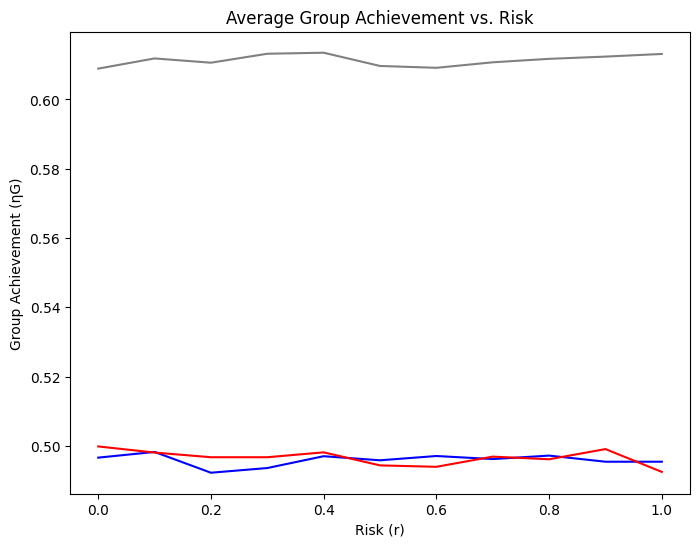

In [34]:
# Parameters
population_size = 200
rich_fraction = 0.2
endowment_rich = 2.5
endowment_poor = 0.625
group_size = 6
threshold = 3
contribution_factor = 0.1
risk = 0.1
homophily = 0.2

# Create the game instance
game = ThresholdPublicGoodsGame(
    population_size, rich_fraction, endowment_rich, endowment_poor,
    group_size, threshold, risk, contribution_factor, homophily
)

# Range of risk values
risks = np.linspace(0, 1, 11)

# Compute ηG for each scenario
eta_no_inequality = []
eta_with_inequality_h0 = []
eta_with_inequality_h1 = []

# Case 1: No inequality
game.endowment_rich = 1
game.endowment_poor = 1
for r in risks:
    eta_no_inequality.append(game.compute_eta_g(risk, homophily))

# Case 2: With inequality, homophily = 0
game.endowment_rich = 2.5
game.endowment_poor = 0.625
homophily = 0
for r in risks:
    eta_with_inequality_h0.append(game.compute_eta_g(risk, homophily))

# Case 3: With inequality, homophily = 1
homophily = 1
for r in risks:
    eta_with_inequality_h1.append(game.compute_eta_g(risk, homophily))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(risks, eta_no_inequality, label="Without inequality", color="gray")
plt.plot(risks, eta_with_inequality_h0, label="With inequality & h=0", color="blue")
plt.plot(risks, eta_with_inequality_h1, label="With inequality & h=1", color="red")
plt.xlabel("Risk (r)")
plt.ylabel("Group Achievement (ηG)")
plt.title("Average Group Achievement vs. Risk")
plt.set_xlim(1)
plt.legend()
plt.grid(True)
plt.show()